In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [ ]:
# code here

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [2]:
car_df=pd.read_csv('carvana .csv')
car_df.head(3)

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [65]:
car_df=car_df[(car_df['Year']>=2018) & (car_df['Year']<=2022)]
pd.pivot_table(car_df,index=['Name'],columns=['Year'],aggfunc={'Price':'mean','Miles':'median'},values=['Price','Miles'])

Miles                             \
Year                                   2018     2019     2020     2021   
Name                                                                     
Acura ILX                           32516.0      NaN      NaN      NaN   
Acura MDX                           86981.0  50959.0      NaN      NaN   
Acura MDX Sport Hybrid                  NaN  32675.0      NaN      NaN   
Acura RDX                               NaN  26612.0  30894.0  10922.0   
Alfa Romeo Giulia                   22441.0  20928.0      NaN      NaN   
...                                     ...      ...      ...      ...   
Volkswagen Passat                   48021.0  47135.0  32237.0  28162.0   
Volkswagen Tiguan                   48034.0  53383.0  45395.0  44425.0   
Volkswagen Tiguan Limited           48794.0      NaN      NaN      NaN   
smart fortwo electric drive         20157.5      NaN      NaN      NaN   
smart fortwo electric drive cabrio  14825.0      NaN      NaN      NaN   

                                                    Price                \
Year                                   2022          2018          2019   
Name                                                                      
Acura ILX                               NaN  23990.000000           NaN   
Acura MDX                               NaN  27990.000000  31590.000000   
Acura MDX Sport Hybrid                  NaN           NaN  42990.000000   
Acura RDX                               NaN           NaN  34542.200000   
Alfa Romeo Giulia                       NaN  29990.000000  30690.000000   
...                                     ...           ...           ...   
Volkswagen Passat                       NaN  20554.705882  23190.000000   
Volkswagen Tiguan                   23096.0  21377.500000  24660.588235   
Volkswagen Tiguan Limited               NaN  19590.000000           NaN   
smart fortwo electric drive             NaN  16940.000000           NaN   
smart fortwo electric drive cabrio      NaN  18590.000000           NaN   

                                                                         
Year                                        2020          2021     2022  
Name                                                                     
Acura ILX                                    NaN           NaN      NaN  
Acura MDX                                    NaN           NaN      NaN  
Acura MDX Sport Hybrid                       NaN           NaN      NaN  
Acura RDX                           37590.000000  43856.666667      NaN  
Alfa Romeo Giulia                            NaN           NaN      NaN  
...                                          ...           ...      ...  
Volkswagen Passat                   25590.000000  25290.000000      NaN  
Volkswagen Tiguan                   24144.818182  26675.714286  29590.0  
Volkswagen Tiguan Limited                    NaN           NaN      NaN  
smart fortwo electric drive                  NaN           NaN      NaN  
smart fortwo electric drive cabrio           NaN           NaN      NaN  

[231 rows x 10 columns]

<Axes: ylabel='Density'>

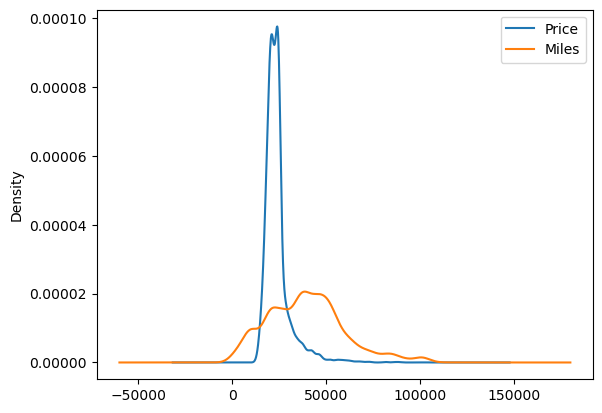

In [11]:
car_df[['Price','Miles']].plot.kde()

In [59]:
car_df['Name'][0].split(' ')[0]

'Chevrolet'

In [61]:
def fun(model):
 return model.split(' ')[0]
car_df['Brand_name']=car_df["Name"].apply(fun)
car_df.head(5)

,Name,Year,Miles,Price,Brand_name
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
3,Jeep Renegade,2019,35372,21590,Jeep
5,Buick Encore,2019,47973,18590,Buick
24,Mitsubishi Eclipse Cross,2018,85475,16990,Mitsubishi


In [69]:
car_df['Year'].astype('str')


0        2018
1        2020
3        2019
5        2019
24       2018
         ... 
21976    2020
21978    2022
21982    2019
21987    2019
21998    2020
Name: Year, Length: 6713, dtype: object

In [71]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6713 entries, 0 to 21998
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6713 non-null   object
 1   Year    6713 non-null   int64 
 2   Miles   6713 non-null   int64 
 3   Price   6713 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 262.2+ KB


In [4]:
car_df['Year']=car_df['Year'].astype('str')

car_df['Year'].unique()[4]

'20173'

In [15]:
def fun_year(year):
 if len(year)>4:
  year=year[:4]
 return year 
car_df['Year']=car_df['Year'].apply(fun_year)


,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,2017,68992,22990


In [16]:
car_df['Year'].unique()

array(['2018', '2020', '2012', '2019', '2017', '2016', '2015', '2014',
       '2010', '2013', '2011', '2021', '2022', '2009', '2023'],
      dtype=object)

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [2]:
power=pd.read_csv('PowerGeneration - PowerGeneration.csv')
power.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [6]:
power['Expected_meet']=power.apply(lambda x:"True" if x["Actual(MU)"]==x["Programme or Expected(MU)"] else "False", axis=1)
power.head(5)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Expected_meet
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,False
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,False
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,False
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,False
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,False


In [34]:
power['Excess(+) / Shortfall (-)'].unique()

array([  5.  , -21.8 ,   5.63, ...,  41.33,  38.25,  50.11])

###Find out the month of the day and store it as a new column.

In [7]:
def month_fun(date):
  return pd.Timestamp(date).month
power['Months']=power.Dates.apply(month_fun)  
  

In [23]:
power.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Months
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,9
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,9
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,9
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,9
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,9


###Find out top 10 frequently appeared power stations in this dataframe.

In [26]:
power['Power Station'].value_counts().head(10)

Power Station
NTPC Ltd.    9570
NHPC         5742
NPCIL        5742
GMR ENERG    5742
JSWEL        3828
TATA PCL     3828
IBPIL        3828
APL          3828
JPPVL        3828
NLC          3828
Name: count, dtype: int64

##Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [30]:
power.pivot_table(index='Power Station',columns='Months',values='Excess(+) / Shortfall (-)',aggfunc='mean')

Months,1,2,3,4,5,6,7,8,9,10,11,12
Power Station,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.644841,NaN,NaN
ABAN POWR,-0.239613,-0.181560,0.179626,-0.437667,-0.262661,-0.159867,-0.028442,-0.273806,-0.216667,-0.171455,-0.329441,-0.370452
ACB,-0.763548,-0.808440,-0.381542,-0.457583,-0.912742,-0.802267,-1.152143,-1.163935,-1.768222,-1.088061,-0.623408,-0.737910
ACPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ADHPL,-0.019677,-0.027234,-0.007897,0.088917,-0.629597,-0.662200,-0.112403,0.080516,0.103556,0.132970,-0.111173,0.017232
...,...,...,...,...,...,...,...,...,...,...,...,...
VESPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VIP,-3.362710,-3.880142,-5.891822,-3.284083,-3.256048,-3.735000,-3.442597,-3.824258,-2.427556,-2.722303,-2.208101,-2.128418
VVL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [44]:

df=pd.read_csv("question-answer.csv")
df.head()

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [49]:
df[~(df.loc[:,'2'].str.contains(r'\?')) & (df.loc[:,'2'].str.contains('Q'))]

,Unnamed: 0,2


###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [8]:
log=pd.read_csv("equip_log.csv")
log.head()

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery


In [18]:
log.shape

(365, 6)

###6. Show `activity` details month wise. Show count for each `activity`

In [8]:
log['Months']=log['dt'].apply(month_fun)

In [56]:
log.groupby('Months')['activity'].value_counts()

Months  activity  
1       Cleaning      10
        Inspection     9
        Checking       7
        Repair         5
2       Repair        10
        Checking       7
        Cleaning       7
        Inspection     4
3       Repair        12
        Checking       8
        Cleaning       6
        Inspection     5
4       Cleaning      11
        Inspection     9
        Checking       5
        Repair         5
5       Repair        11
        Cleaning       8
        Inspection     7
        Checking       5
6       Repair        10
        Inspection     8
        Cleaning       7
        Checking       5
7       Inspection    14
        Checking       6
        Cleaning       6
        Repair         5
8       Cleaning      10
        Inspection     9
        Checking       8
        Repair         4
9       Inspection    12
        Checking       8
        Repair         7
        Cleaning       3
10      Checking      13
        Repair         9
        Inspection     5
      

###7. Find employee who did most `activity` in January month.

In [26]:
em_id=log[log['Months']==1]['emp_id'].value_counts().idxmax()
log_emp[log_emp['emp_id']==em_id]['FIRST_NAME']

13     Payam
67     Payam
70     Payam
90     Payam
187    Payam
254    Payam
273    Payam
289    Payam
290    Payam
Name: FIRST_NAME, dtype: object

In [10]:
log_emp=log.merge(emp,left_on='emp_id',right_on='EMPLOYEE_ID')
log_emp.head()



,Log_ID,dt,dept,emp_id,activity,eqpt,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,115,Alexander,Khoo,AKHOO
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,105,David,Austin,DAUSTIN
2,1002,2022-01-09,Dept3,112,Inspection,CPU,112,NaN,Urman,JMURMAN
3,1003,2022-01-10,Dept4,120,Inspection,UPS,120,Matthew,Weiss,MWEISS
4,1004,2022-01-11,Dept3,138,Checking,Battery,138,Stephen,Stiles,SSTILES


7. Find employee who did most activity in January month.

In [37]:
jun_log=log[(log['dt']>='2022-01-1') & (log['dt']<='2022-02-1')]
jun_log['emp_id'].value_counts().idxmax()

120

In [9]:
emp=pd.read_csv("employee.csv")
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [45]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EMPLOYEE_ID  41 non-null     int64 
 1   FIRST_NAME   38 non-null     object
 2   LAST_NAME    41 non-null     object
 3   EMAIL        41 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


###8. Employee who have worked most no of times on Weekends.

In [15]:
date=pd.Timestamp("2025-05-13")
date.weekday()
date.day_name()


'Tuesday'

In [17]:
def weekday(dt):
  return pd.Timestamp(dt).weekday()
log_emp['weekday']=log_emp.dt.apply(weekday)  
log_emp.head()

,Log_ID,dt,dept,emp_id,activity,eqpt,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,weekday
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,115,Alexander,Khoo,AKHOO,4
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,105,David,Austin,DAUSTIN,5
2,1002,2022-01-09,Dept3,112,Inspection,CPU,112,NaN,Urman,JMURMAN,6
3,1003,2022-01-10,Dept4,120,Inspection,UPS,120,Matthew,Weiss,MWEISS,0
4,1004,2022-01-11,Dept3,138,Checking,Battery,138,Stephen,Stiles,SSTILES,1


In [27]:
weekend_emp=log_emp[(log_emp["weekday"]==5) | (log_emp["weekday"]==6)]
log_emp[log_emp["emp_id"]==weekend_emp.emp_id.value_counts().idxmax()]

,Log_ID,dt,dept,emp_id,activity,eqpt,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,weekday
12,1016,2022-01-23,Dept2,109,Cleaning,Generator,109,Daniel,Faviet,DFAVIET,6
31,1037,2022-02-13,Dept1,109,Repair,UPS,109,Daniel,Faviet,DFAVIET,6
50,1058,2022-03-06,Dept4,109,Repair,Generator,109,Daniel,Faviet,DFAVIET,6
107,1132,2022-05-19,Dept3,109,Inspection,UPS,109,Daniel,Faviet,DFAVIET,3
171,1213,2022-08-08,Dept2,109,Inspection,Fan,109,Daniel,Faviet,DFAVIET,0
178,1221,2022-08-16,Dept6,109,Cleaning,Generator,109,Daniel,Faviet,DFAVIET,1
186,1229,2022-08-24,Dept2,109,Inspection,CPU,109,Daniel,Faviet,DFAVIET,2
205,1249,2022-09-13,Dept2,109,Repair,CPU,109,Daniel,Faviet,DFAVIET,1
238,1291,2022-10-25,Dept6,109,Cleaning,CPU,109,Daniel,Faviet,DFAVIET,1
248,1304,2022-11-07,Dept2,109,Cleaning,Pump,109,Daniel,Faviet,DFAVIET,0


###9. Which activity is logged most on buisness days.

In [28]:
weekend_emp=log_emp[(log_emp["weekday"]==0) | (log_emp["weekday"]==1) | (log_emp["weekday"]==2) | (log_emp["weekday"]==3) | (log_emp["weekday"]==4) | (log_emp["weekday"]==5) | (log_emp["weekday"]==6)]
log_emp[log_emp["emp_id"]==weekend_emp.emp_id.value_counts().idxmax()]

,Log_ID,dt,dept,emp_id,activity,eqpt,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,weekday
12,1016,2022-01-23,Dept2,109,Cleaning,Generator,109,Daniel,Faviet,DFAVIET,6
31,1037,2022-02-13,Dept1,109,Repair,UPS,109,Daniel,Faviet,DFAVIET,6
50,1058,2022-03-06,Dept4,109,Repair,Generator,109,Daniel,Faviet,DFAVIET,6
107,1132,2022-05-19,Dept3,109,Inspection,UPS,109,Daniel,Faviet,DFAVIET,3
171,1213,2022-08-08,Dept2,109,Inspection,Fan,109,Daniel,Faviet,DFAVIET,0
178,1221,2022-08-16,Dept6,109,Cleaning,Generator,109,Daniel,Faviet,DFAVIET,1
186,1229,2022-08-24,Dept2,109,Inspection,CPU,109,Daniel,Faviet,DFAVIET,2
205,1249,2022-09-13,Dept2,109,Repair,CPU,109,Daniel,Faviet,DFAVIET,1
238,1291,2022-10-25,Dept6,109,Cleaning,CPU,109,Daniel,Faviet,DFAVIET,1
248,1304,2022-11-07,Dept2,109,Cleaning,Pump,109,Daniel,Faviet,DFAVIET,0


###10. Week Days wise activity table.

In [ ]:
log_

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [46]:
emp['FIRST_NAME']=emp['FIRST_NAME'].fillna(emp['EMAIL'][:3])


In [48]:
emp['FIRST_NAME']

0        Steven
1         Neena
2           Lex
3     Alexander
4         Bruce
5         David
6         Valli
7         Diana
8         Nancy
9        Daniel
10         John
11       Ismael
12          NaN
13         Luis
14          Den
15    Alexander
16       Shelli
17        Sigal
18          Guy
19        Karen
20      Matthew
21          NaN
22        Payam
23       Shanta
24        Kevin
25        Julia
26        Irene
27        James
28       Steven
29        Laura
30        Mozhe
31        James
32          NaN
33        Jason
34      Michael
35           Ki
36        Hazel
37       Renske
38      Stephen
39         John
40       Joshua
Name: FIRST_NAME, dtype: object

In [49]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EMPLOYEE_ID  41 non-null     int64 
 1   FIRST_NAME   38 non-null     object
 2   LAST_NAME    41 non-null     object
 3   EMAIL        41 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


##You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'. E.g- Email field -> JMURMAN result -> JMURMAN@CAMPUSX.COM

In [53]:
def email_fun(email):
 return email+'@campusx.com'
emp['EMAIL']=emp['EMAIL'].apply(email_fun)
 

In [54]:
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING@campusx.com
1,101,Neena,Kochhar,NKOCHHAR@campusx.com
2,102,Lex,De Haan,LDEHAAN@campusx.com
3,103,Alexander,Hunold,AHUNOLD@campusx.com
4,104,Bruce,Ernst,BERNST@campusx.com


#####Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [72]:
df=log_emp[log_emp['FIRST_NAME'].str.startswith('A',na=False)]
df1=df[(df['activity']=='Incpection') |(df['activity']=='Cleaning')|(df['activity']=='Checking')]

df1['fullname']=df1['FIRST_NAME']+" "+df['LAST_NAME']
df1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_29384\1136585326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fullname']=df1['FIRST_NAME']+" "+df['LAST_NAME']


,Log_ID,dt,dept,emp_id,activity,eqpt,Months,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,fullname
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,1,115,Alexander,Khoo,AKHOO,Alexander Khoo
32,1038,2022-02-14,Dept2,115,Cleaning,Fan,2,115,Alexander,Khoo,AKHOO,Alexander Khoo
78,1093,2022-04-10,Dept2,103,Checking,AC,4,103,Alexander,Hunold,AHUNOLD,Alexander Hunold
181,1224,2022-08-19,Dept1,103,Cleaning,AC,8,103,Alexander,Hunold,AHUNOLD,Alexander Hunold
240,1293,2022-10-27,Dept4,115,Checking,CPU,10,115,Alexander,Khoo,AKHOO,Alexander Khoo
